## 1. Importing Data

In [294]:
#importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [295]:
#adding data city of london
may_21 = pd.read_csv('2021-05-city-of-london-street.csv')
jun_21 = pd.read_csv('2021-06-city-of-london-street.csv')
jul_21 = pd.read_csv('2021-07-city-of-london-street.csv')
aug_21 = pd.read_csv('2021-08-city-of-london-street.csv')
sep_21 = pd.read_csv('2021-09-city-of-london-street.csv')
oct_21 = pd.read_csv('2021-10-city-of-london-street.csv')
nov_21 = pd.read_csv('2021-11-city-of-london-street.csv')
dec_21 = pd.read_csv('2021-12-city-of-london-street.csv')
jan_22 = pd.read_csv('2022-01-city-of-london-street.csv')
feb_22 = pd.read_csv('2022-02-city-of-london-street.csv')
mar_22 = pd.read_csv('2022-03-city-of-london-street.csv')
apr_22 = pd.read_csv('2022-04-city-of-london-street.csv')
may_22 = pd.read_csv('2022-05-city-of-london-street.csv')

## 2. Preprocessing Data

combining all the months for easier handling

In [296]:
data = pd.concat([may_21, jun_21 , jul_21, aug_21, sep_21, oct_21, nov_21, dec_21, jan_22, feb_22, mar_22, apr_22, may_22])

Looking at what column does the data have

In [297]:
data.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

Dropping the unnecessary columns

In [298]:
data = data.drop(data.columns[[0,2,3,10,11]],axis=1)
#axis = 1 means that the operation are perform on the columns of the DataFrame

In [299]:
data

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2021-05,-0.109582,51.522017,On or near Clerkenwell Road,E01000916,Camden 027B,Drugs
1,2021-05,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Public order
2,2021-05,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Theft from the person
3,2021-05,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour
4,2021-05,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour
...,...,...,...,...,...,...,...
713,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime
714,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime
715,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime
716,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime


Removing the rows with any NaN

In [300]:
data = data.dropna()
data

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2021-05,-0.109582,51.522017,On or near Clerkenwell Road,E01000916,Camden 027B,Drugs
1,2021-05,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Public order
2,2021-05,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Theft from the person
3,2021-05,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour
4,2021-05,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour
...,...,...,...,...,...,...,...
659,2022-05,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Other theft
660,2022-05,-0.079130,51.507808,On or near Ferry Terminal,E01004293,Tower Hamlets 027B,Robbery
661,2022-05,-0.079130,51.507808,On or near Ferry Terminal,E01004293,Tower Hamlets 027B,Robbery
662,2022-05,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Theft from the person


Looking at the data type of each column

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7856 entries, 0 to 663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       7856 non-null   object 
 1   Longitude   7856 non-null   float64
 2   Latitude    7856 non-null   float64
 3   Location    7856 non-null   object 
 4   LSOA code   7856 non-null   object 
 5   LSOA name   7856 non-null   object 
 6   Crime type  7856 non-null   object 
dtypes: float64(2), object(5)
memory usage: 491.0+ KB


Finding how many LSOA are there and what are there

In [302]:
print('Number of LSOA: ', data['LSOA name'].nunique())
data['LSOA name'].unique()

Number of LSOA:  60


array(['Camden 027B', 'Camden 028B', 'City of London 001A',
       'City of London 001B', 'City of London 001C',
       'City of London 001E', 'City of London 001F',
       'City of London 001G', 'Hackney 027F', 'Islington 022D',
       'Islington 023D', 'Islington 023E', 'Southwark 002C',
       'Tower Hamlets 009C', 'Tower Hamlets 015B', 'Tower Hamlets 021C',
       'Tower Hamlets 021D', 'Tower Hamlets 021F', 'Tower Hamlets 027B',
       'Westminster 018A', 'Hackney 025D', 'Hackney 027G',
       'Islington 022H', 'Southwark 003H', 'Tower Hamlets 019C',
       'Westminster 018B', 'Haringey 015C', 'Tower Hamlets 018D',
       'Islington 014C', 'Newham 013G', 'Southwark 001C',
       'Tower Hamlets 021E', 'Westminster 020C', 'Camden 024B',
       'Hackney 019A', 'Hackney 022D', 'Southwark 003E', 'Southwark 006E',
       'Tower Hamlets 017A', 'Islington 003B', 'Tower Hamlets 025B',
       'Waltham Forest 015B', 'Westminster 018C', 'Tower Hamlets 015E',
       'Tower Hamlets 026B', 'Walth

## 3. EDA Data

In [303]:
crime = data['Crime type'].unique()
crime

array(['Drugs', 'Public order', 'Theft from the person',
       'Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Vehicle crime', 'Criminal damage and arson', 'Other theft',
       'Violence and sexual offences', 'Other crime',
       'Possession of weapons', 'Robbery', 'Shoplifting'], dtype=object)

In [304]:
crime_type = pd.DataFrame(data['Crime type'].value_counts())
crime_type.iloc[:,]


,Crime type
Violence and sexual offences,1355
Other theft,1228
Anti-social behaviour,984
Theft from the person,977
Shoplifting,750
Drugs,618
Public order,562
Criminal damage and arson,311
Bicycle theft,274
Burglary,268


Plotting the distribution of rate crime type for each month

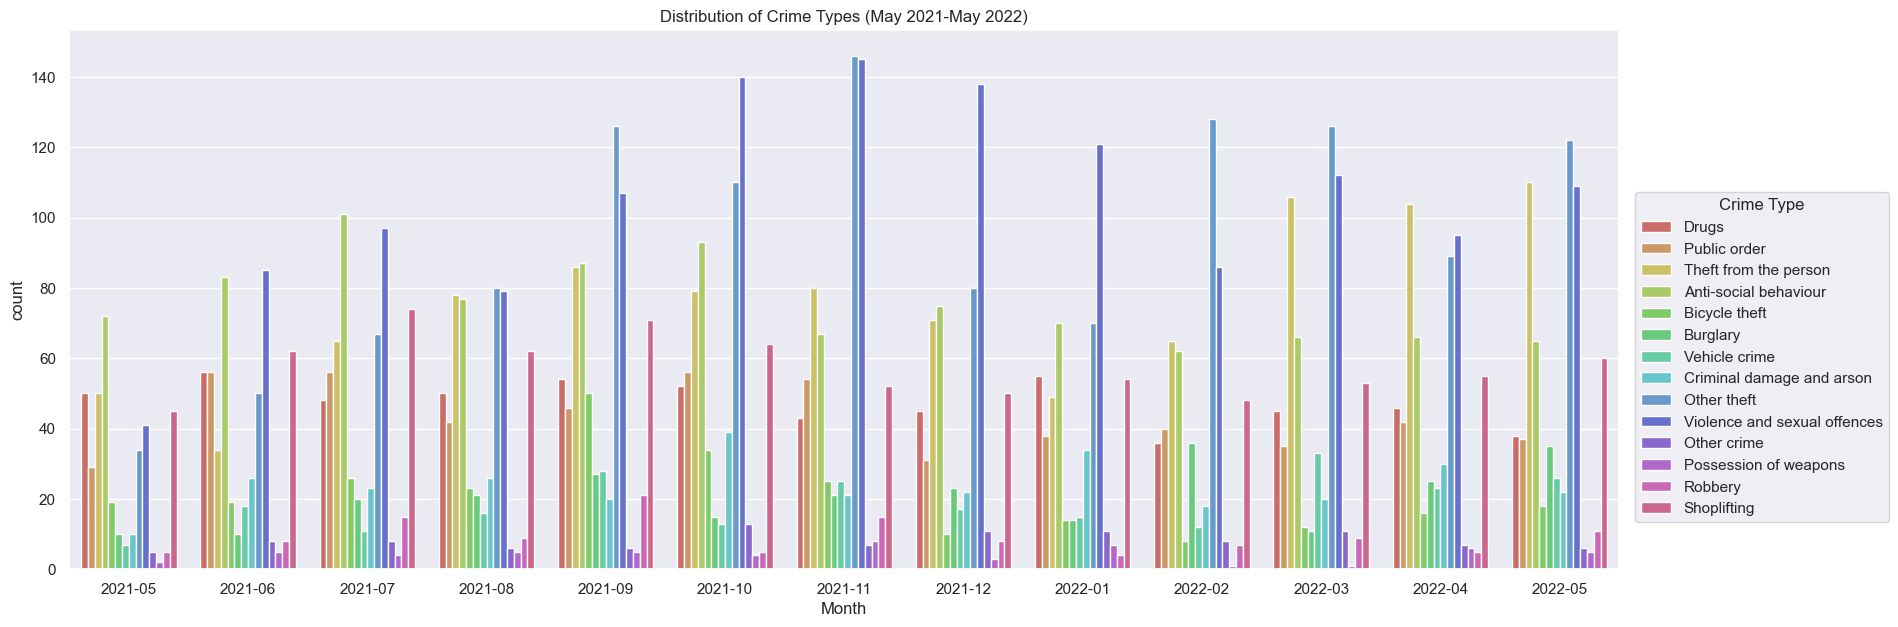

In [305]:
sns.set(rc={'figure.figsize': (20,7)})
graph = sns.countplot(x ='Month', data = data, hue = 'Crime type', palette= 'hls').set(title='Distribution of Crime Types (May 2021-May 2022)')
plt.legend(bbox_to_anchor=(1.01, 0.7), loc='upper left', borderaxespad=0, title='Crime Type')

Violence and Sexual Offences is choosen as it is the highest type of crime rate 

In [306]:
vso =data[data['Crime type'].str.startswith('Violence and sexual offences')]
vso

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
42,2021-05,-0.092297,51.518949,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences
47,2021-05,-0.094468,51.521853,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences
74,2021-05,-0.074210,51.511711,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences
75,2021-05,-0.076435,51.513627,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences
76,2021-05,-0.075722,51.511053,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences
...,...,...,...,...,...,...,...
650,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
651,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
653,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences
654,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences


The CRS for latitude and longitude is WGS84 or ESPG:4326

## 4. Preprocessing Shapefile

In [307]:
shapefile = gpd.read_file('LSOA_2011_London_gen_MHW.shp')

In [308]:
shapefile.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry'],
      dtype='object')

In [309]:
LSOA = shapefile[shapefile['LSOA11NM'].str.startswith('City of London')]
LSOA

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4674,E01032739,City of London 001F,E02000001,City of London 001,E09000001,City of London,E12000007,London,1044,1002,42,6.3,676,1.5,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
4675,E01032740,City of London 001G,E02000001,City of London 001,E09000001,City of London,E12000007,London,1099,1049,50,17.2,719,1.5,"POLYGON ((532022.374 181893.469, 532021.188 18..."


There are only 6 LSOA shapefile polygon for City of London

<AxesSubplot:>

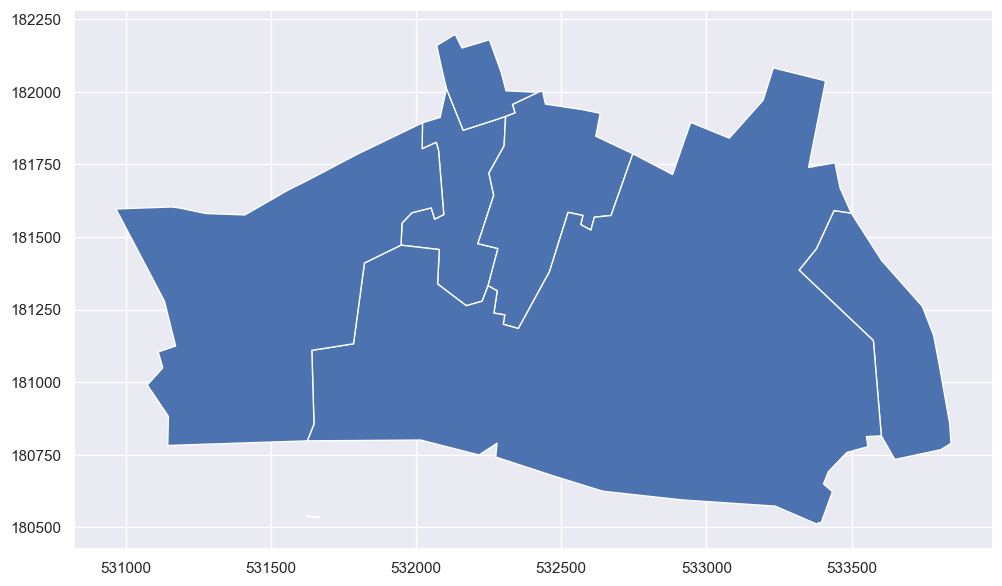

In [310]:
LSOA.plot()

In [311]:
#exporting the City of London LSOA to a file
LSOA.to_file('LSOA_City_of_London')

In [312]:
LSOA.crs

<Derived Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

The LSOA shapefile uses British National Grid or ESPG: 27700

## 5. Transforming CRS

The datasets of the Violence and sexual Offences are in latlong and we aave to convert it to Easting and Northing to be able to plot in the same CRS as the LSOA City of London Shapefile

In [313]:
#latlong to easting/northing - making the transformer
from pyproj import crs
from pyproj import Transformer
transformer = Transformer.from_crs('EPSG:4326', 'EPSG:27700')


In [314]:
vso

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
42,2021-05,-0.092297,51.518949,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences
47,2021-05,-0.094468,51.521853,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences
74,2021-05,-0.074210,51.511711,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences
75,2021-05,-0.076435,51.513627,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences
76,2021-05,-0.075722,51.511053,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences
...,...,...,...,...,...,...,...
650,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
651,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
653,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences
654,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences


In [315]:
vso['Easting'], vso['Northing'] = transformer.transform(vso['Latitude'].values, vso['Longitude'].values)
vso.head()

C:\Users\zohar\AppData\Local\Temp\ipykernel_18888\1283672645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vso['Easting'], vso['Northing'] = transformer.transform(vso['Latitude'].values, vso['Longitude'].values)


,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Easting,Northing
42,2021-05,-0.092297,51.518949,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences,532459.001142,181727.999350
47,2021-05,-0.094468,51.521853,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences,532299.973377,182047.008921
74,2021-05,-0.074210,51.511711,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences,533735.009271,180955.982406
75,2021-05,-0.076435,51.513627,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences,533575.020166,181164.986527
76,2021-05,-0.075722,51.511053,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences,533632.018301,180880.051262


In [318]:
#exporting
vso.to_csv("VSO.csv")